## Problem Statement:

 HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
 
 As Help International has raised funding around $ 10 million, now we need to indentify contries which are in direst need of aid. 
 
 The aim of these exercise is to identify these countries based on data provided and identify atleast 5 countries to which Help International can provide help.

## Table of Contents:

  1. [Import Libraries and setup environment](#Import)
  2. [Read csv data file and create Dataframe](#ReadData)
  3. [Check dataframe size and basic data quality](#DataChecks)
  4. [Derived Data](#DerivedData)
  5. [Missing data analysis and deletion of high % missing data columns](#MissingData)
  6. [Checking for Outliers](#Outliers)
  7. [Feature Standardisation](#Standardisation)
  8. [PCA Evaluation](#PCA_eval)
  9. [Outlier Handling After PCA](#OutliersPCA)
  10. [Check Clustering ability and Idnetify no of Clusters](#ClustersIndentification)
  11. [K-Means Clustering](#kmeans)
     - [Analysis of the clusters](#kmeansAnalysis)
     - [K-Means Clustering Observations](#kmeansObservations)
     - [K-Means Clustering - Findings](#kmeansFindings)
  12. [Hierarchical clustering](#Hierarchical)
    - [Single Linkage](#single)
    - [Complete Linkage](#complete)
    - [Hierarchical clustering Analysis](#HierarchicalclusteringAnalysis)
    - [Hierarchical clustering - Findings](#HierarchicalclusteringFinding)
  13. [Recommendation](#Recommendation)






<a id='Import'></a>
## Import all the required libraries

In [1]:
#import all the libraries required for the assignment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

%matplotlib inline

In [2]:
# Create a class color for setting print formatting
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


<a id='ReadData'></a>
## Import Data and check basic details

In [3]:
df = pd.read_csv("Country-data.csv")

<a id='DataChecks'></a>
## Check dataframe size and basic data quality

In [4]:
# Display shape of the dataframe


print(color.BOLD+color.BLUE+'Shape of the dataframe df : {}'.format(df.shape) +color.END)

Shape of the dataframe df : (167, 10)


In [5]:
# Display first 5 rows of the dataframe df to have a quick view at the data

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<a id='DerivedData'></a>
## Derived Data

In [8]:
#As Import , Export and Health values are givern as %age of Total GDP
# Lets derived the Per capita Export/Import values as well as Per capita spending on Health
df['exportsPerCapita'] = df['exports']*df['gdpp']/100
df['importsPerCapita'] = df['imports']*df['gdpp']/100
df['healthPerCapita'] = df['health']*df['gdpp']/100

#Now we can remove the Export/Import/Health Columns
df = df.drop(['exports','imports','health'], axis = 1)

<a id='MissingData'></a>
## Missing data analysis 

In [9]:
#Before moving ahead with our EDA, we need to check dataframe for the missing data.
#In the case where the column has more than 50% of the data missing,
#it would be adivisable to remove that column as the analysis of columns with more than 50% data would not give us correct results

#We will display total missing records for each column and find the % of the missing values which can help use for our next step.

Total_missing = df.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df.isnull().sum()/df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(25)

,Total_missing_values,Percent_missing_values
healthPerCapita,0,0.0
importsPerCapita,0,0.0
exportsPerCapita,0,0.0
gdpp,0,0.0
total_fer,0,0.0
life_expec,0,0.0
inflation,0,0.0
income,0,0.0
child_mort,0,0.0
country,0,0.0


**No Data is missing so we can move ahead without need of any missing data measures**

<a id='Outliers'></a>
## Checking for Outliers

In [10]:
#outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,17144.688623,7.781832,70.555689,2.947964,12964.155689,7420.618847,6588.352108,1056.733204
std,40.328931,19278.067698,10.570704,8.893172,1.513848,18328.704809,17973.885795,14710.810418,1801.408906
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920,0.651092,12.821200
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,640.215000,78.535500
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,2045.580000,321.886000
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,7719.600000,976.940000
90%,100.220000,41220.000000,16.640000,80.400000,5.322000,41840.000000,17760.600000,15034.280000,3825.416000
95%,116.000000,48290.000000,20.870000,81.400000,5.861000,48610.000000,31385.100000,24241.560000,4966.701000
99%,153.400000,84374.000000,41.478000,82.370000,6.563600,79088.000000,64794.260000,55371.390000,8410.330400


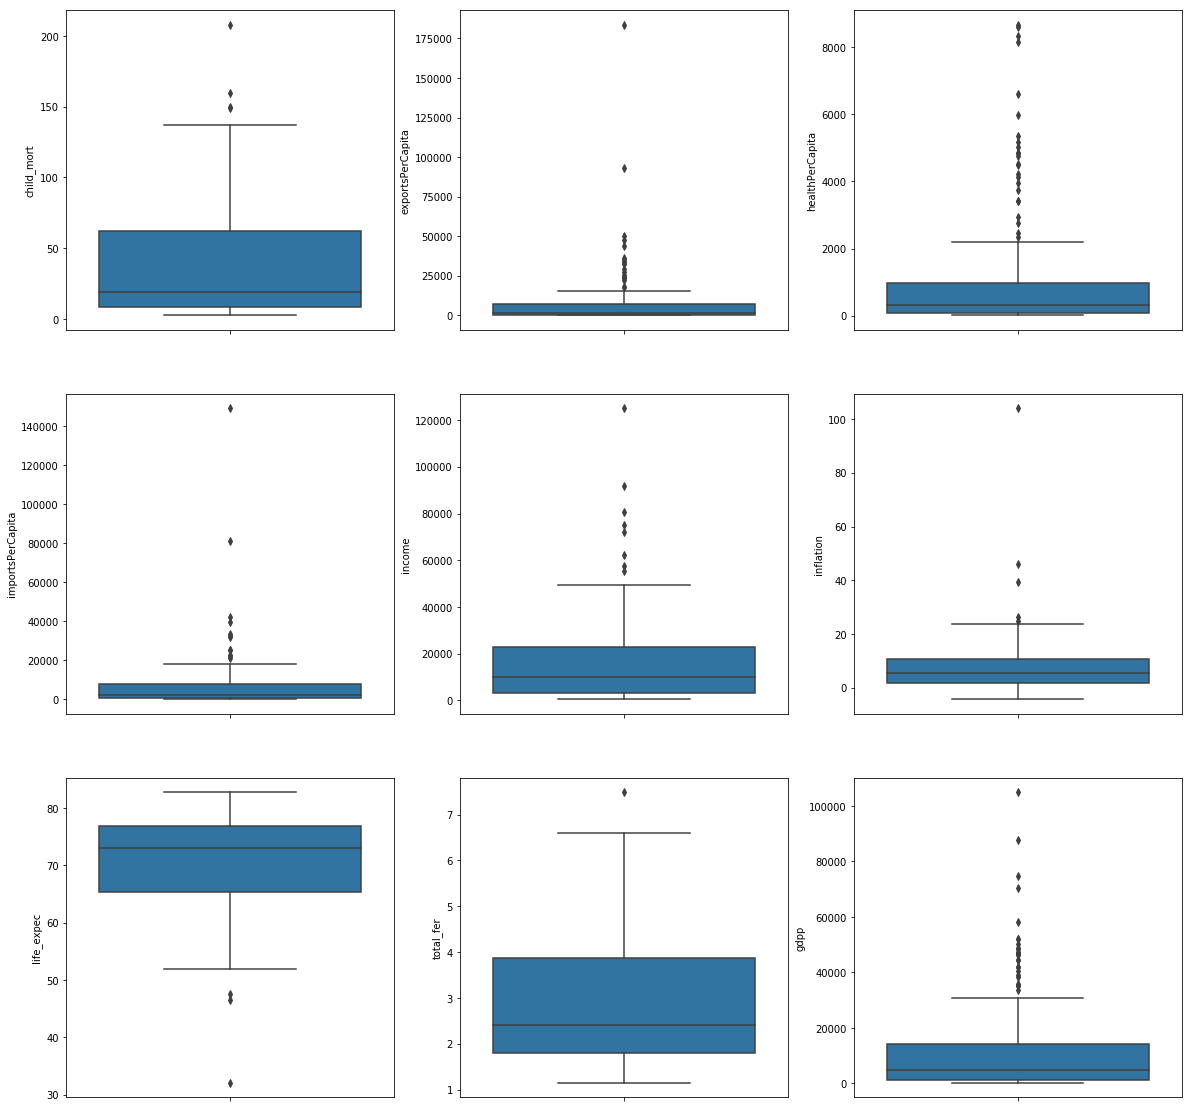

In [11]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y = 'child_mort', data = df)
plt.subplot(3,3,2)
sns.boxplot(y = 'exportsPerCapita', data = df)
plt.subplot(3,3,3)
sns.boxplot(y = 'healthPerCapita', data = df)
plt.subplot(3,3,4)
sns.boxplot(y = 'importsPerCapita', data = df)
plt.subplot(3,3,5)
sns.boxplot(y = 'income', data = df)
plt.subplot(3,3,6)
sns.boxplot(y = 'inflation', data = df)
plt.subplot(3,3,7)
sns.boxplot(y = 'life_expec', data = df)
plt.subplot(3,3,8)
sns.boxplot(y = 'total_fer', data = df)
plt.subplot(3,3,9)
sns.boxplot(y = 'gdpp', data = df)
plt.show()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita
7,Australia,4.8,41400,1.160,82.0,1.93,51900,10276.2000,10847.100,4530.8700
26,Burundi,93.6,764,12.300,57.7,6.26,231,20.6052,90.552,26.7960
31,Central African Republic,149.0,888,2.010,47.5,5.21,446,52.6280,118.190,17.7508
37,"Congo, Dem. Rep.",116.0,609,20.800,57.5,6.54,334,137.2740,165.664,26.4194
44,Denmark,4.1,44000,3.220,79.5,1.87,58000,29290.0000,25288.000,6612.0000
73,Ireland,4.2,45700,-3.220,80.4,2.05,48700,50161.0000,42125.500,4475.5300
88,Liberia,89.3,700,5.470,60.8,5.02,327,62.4570,302.802,38.5860
91,Luxembourg,2.8,91700,3.620,81.3,1.63,105000,183750.0000,149100.000,8158.5000
93,Madagascar,62.2,1390,8.790,60.8,4.60,413,103.2500,177.590,15.5701
94,Malawi,90.5,1030,12.100,53.1,5.31,459,104.6520,160.191,30.2481


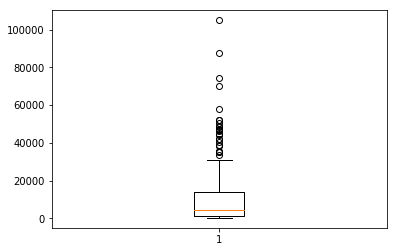

In [12]:
#Remove outliers in PC1
plt.boxplot(df.gdpp)
Q1 = df.gdpp.quantile(0.05)
Q3 = df.gdpp.quantile(0.95)
IQR = Q3 - Q1
#pca_df = pca_df[(pca_df.PC1 >= Q1) & (pca_df.PC1 <= Q3)]

df[(df.gdpp < Q1) | (df.gdpp > Q3)]

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita
3,Angola,119.0,5900,22.400,60.1,6.16,3530,2199.190,1514.370,100.6050
31,Central African Republic,149.0,888,2.010,47.5,5.21,446,52.628,118.190,17.7508
32,Chad,150.0,1930,6.390,56.5,6.59,897,330.096,390.195,40.6341
43,Czech Republic,3.4,28300,-1.430,77.5,1.51,19800,13068.000,12454.200,1560.2400
53,Finland,3.0,39800,0.351,80.0,1.87,46200,17879.400,17278.800,4134.9000
66,Haiti,208.0,1500,5.450,32.1,3.33,662,101.286,428.314,45.7442
68,Iceland,2.6,38800,5.470,82.0,2.20,41900,22374.600,18142.700,3938.6000
77,Japan,3.2,35800,-1.900,82.8,1.39,44500,6675.000,6052.000,4223.0500
91,Luxembourg,2.8,91700,3.620,81.3,1.63,105000,183750.000,149100.000,8158.5000
97,Mali,137.0,1870,4.370,59.5,6.55,708,161.424,248.508,35.2584


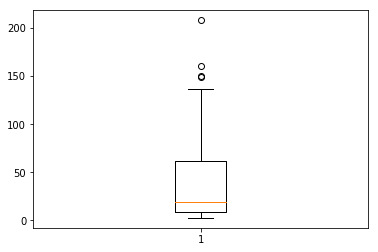

In [13]:
#Remove outliers in PC1
plt.boxplot(df.child_mort)
Q1 = df.child_mort.quantile(0.05)
Q3 = df.child_mort.quantile(0.95)
IQR = Q3 - Q1
#pca_df = pca_df[(pca_df.PC1 >= Q1) & (pca_df.PC1 <= Q3)]

df[(df.child_mort < Q1) | (df.child_mort > Q3)]

**We have some outliers in the dataset, But if we remove the outlier we might missout on important information.**

**so  we will perform outlier analysis again after PCA and handle the Outliers after PCA**

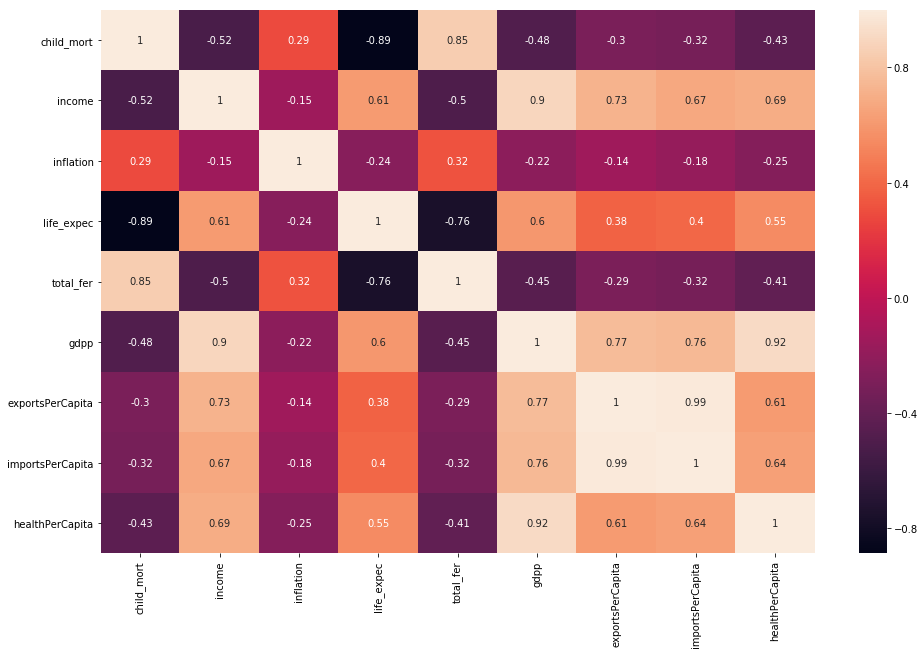

In [14]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))

sns.heatmap(df.corr(),annot = True)

plt.show()

**All features except income/inflation/gdpp seems to have gradual increase.**


### Create Feature and Label data set

In [15]:
##Create data set which can be used for PCA and the Label set which we will need later on for clutering 
X = df.drop(['country'],axis=1)
y = df['country']

In [16]:
#Create list of the columns from the dataset
X_columns = X.columns.tolist()

<a id='Standardisation'></a>
## Feature Standardisation

Before applying PCA, we need to standardise the data as in PCA we are going to project the data on the eigenvectors of the covariance matrix and if data is of different range then this will case eigenvectors to be of different length which in turn will result n streched eigenspace of covariance matrix . 

In [17]:
from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X.astype('float64'))
X= X_scaler.transform(X.astype('float64'))  



<a id='PCA_eval'></a>
## PCA Evaluation

In [18]:
#Importing the PCA module and we will use svd_solver='randomized'in the PCA model building
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [19]:
#Fit PCA  model on our dataset
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [20]:
#lets check the PC1 and PC2
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':X_columns})
pcs_df.head()

,PC1,PC2,Feature
0,-0.316392,0.476267,child_mort
1,0.380041,0.128384,income
2,-0.143085,0.221261,inflation
3,0.343857,-0.369820,life_expec
4,-0.302842,0.459715,total_fer


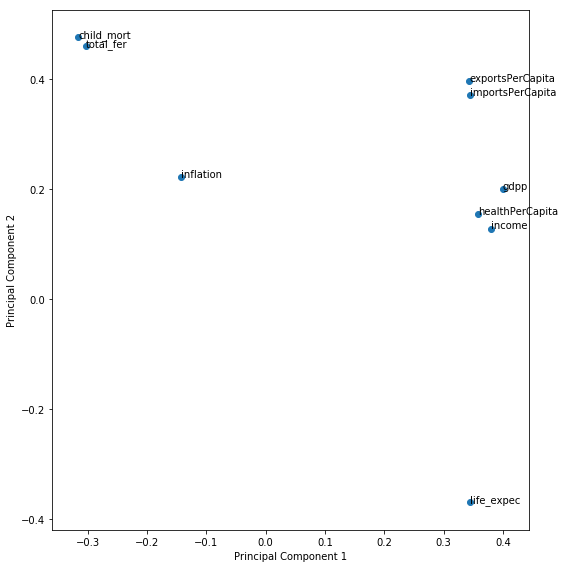

In [21]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [22]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

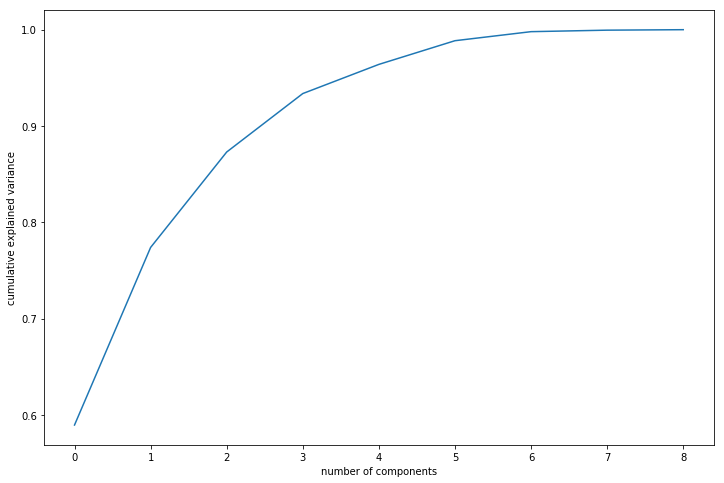

In [23]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**With 4 components we can have around 94% variance, so we will use 4 componenets**



In [24]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [25]:
#Fit and transform the Dataset into our PCA model
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

In [26]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

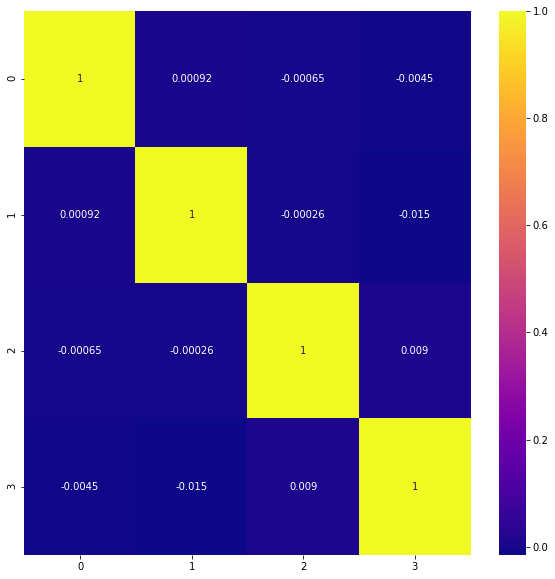

In [27]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(np.corrcoef(pc),annot = True,cmap='plasma')
plt.show()

**All the correlations between the principle compoenents are almost zeros, so we have created independent PC which we can use for clustering**

In [28]:
pca_df = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3], 'Country': y})

<a id='OutliersPCA'></a>

## Outlier Handling After PCA

,PC1,PC2,PC3,PC4,Country
15,3.961102,0.837658,-0.295168,0.243892,Belgium
26,-2.763588,1.628834,-0.295656,0.316531,Burundi
31,-3.238143,2.182754,-1.613568,0.254538,Central African Republic
32,-3.186760,2.359783,-1.077936,0.540646,Chad
37,-3.116056,2.172740,0.357523,0.435244,"Congo, Dem. Rep."
44,4.379423,0.928432,-0.225448,1.502264,Denmark
66,-3.938184,3.045279,-1.798863,0.068252,Haiti
73,4.659942,1.401536,-0.753865,-0.390515,Ireland
91,12.633634,8.219800,-0.571184,-4.587245,Luxembourg
97,-2.945589,2.014719,-1.137255,0.508644,Mali


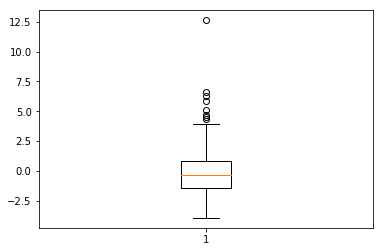

In [29]:
#Remove outliers in PC1
plt.boxplot(pca_df.PC1)
Q1 = pca_df.PC1.quantile(0.05)
Q3 = pca_df.PC1.quantile(0.95)
IQR = Q3 - Q1
#pca_df = pca_df[(pca_df.PC1 >= Q1) & (pca_df.PC1 <= Q3)]

pca_df[(pca_df.PC1 < Q1) | (pca_df.PC1 > Q3)]

**PC1 outliers seems to be removeing countries which are either very poor and very rich, with extream child mortality rates**

**If we remove these outliers we will miss out on important countries which actually need the aid**

,PC1,PC2,PC3,PC4,Country
1,-0.023845,-1.435816,-0.009080,-0.442921,Albania
3,-2.723581,2.176018,0.597794,0.438919,Angola
20,0.251205,-1.700660,-0.238844,-0.462239,Bosnia and Herzegovina
31,-3.238143,2.182754,-1.613568,0.254538,Central African Republic
32,-3.186760,2.359783,-1.077936,0.540646,Chad
34,-0.130237,-1.365886,0.180697,-0.436825,China
39,0.429915,-1.376989,0.266801,-0.156064,Costa Rica
49,-1.053256,2.702003,1.060730,0.425477,Equatorial Guinea
66,-3.938184,3.045279,-1.798863,0.068252,Haiti
86,0.645933,-1.500902,-0.266629,-0.348789,Lebanon


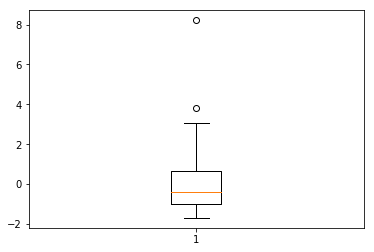

In [30]:
#Remove outliers in PC2
plt.boxplot(pca_df.PC2)
Q1 = pca_df.PC2.quantile(0.05)
Q3 = pca_df.PC2.quantile(0.95)
IQR = Q3 - Q1
#pca_df = pca_df[(pca_df.PC2 >= Q1) & (pca_df.PC2 <= Q3)]
pca_df[(pca_df.PC2 < Q1) | (pca_df.PC2 > Q3)]

**PC2 outliers seems to be removeing countries which are either very poor and very rich, with extream child mortality rates**

**If we remove these outliers we will miss out on important countries which actually need the aid**

**So we will continue with existing data without any outlier removal**

In [31]:
#Create a dataframe which can be used for further processing.
#The pca_df dataframe can be used for merging based on country name
cluster_df = pca_df[['PC1','PC2','PC3','PC4']]

<a id='ClustersIndentification'></a>

## Check Clustering ability and Idnetify no of Clusters

In [32]:
#Function to calculate the Hopkins Score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
print(color.BOLD+color.BLUE+'Hopkins Score : {}'.format(hopkins(pd.DataFrame(cluster_df))) +color.END)

Hopkins Score : 0.9453482244228834


**As the value is quite high, it has a high tendency to cluster**

In [34]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(cluster_df)
    sse_.append([k, silhouette_score(cluster_df, kmeans.labels_)])

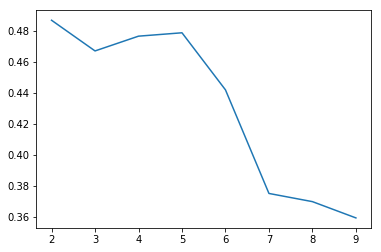

In [35]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

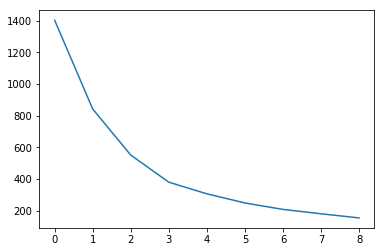

In [36]:
## From the above analysis we find that 3 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(cluster_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

<a id='kmeans'></a>
## K-Means Clustering

In [37]:
#As the silhouette score for n_clusters=4 shows imporvement over the previous score 
# elbow curve show bend at 3 clusters 
# We need to select one number which would be 3 in this case
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state = 50)
kmeans.fit(cluster_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [38]:
df_kmean=pca_df
df_kmean.index = pd.RangeIndex(len(df_kmean.index))
data_km = pd.concat([df_kmean, pd.Series(kmeans.labels_)], axis=1)
data_km.columns = ['PC1', 'PC2','PC3','PC4','Country','ClusterID']
data_km['ClusterID'].value_counts()

1    91
2    48
0    28
Name: ClusterID, dtype: int64

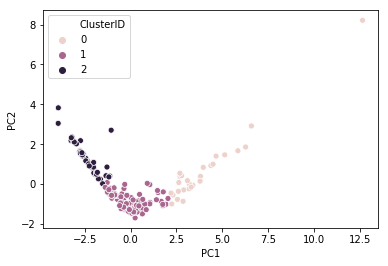

In [39]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=data_km)
plt.show()

In [40]:
#Merge clustering information with the original dataset
df_Kmeans=pd.merge(df,data_km, how = 'inner', left_on='country', right_on='Country')
df_Kmeans.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,ClusterID
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174,-2.636647,1.472085,-0.546500,0.237267,Afghanistan,2
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,-0.023845,-1.435816,-0.009080,-0.442921,Albania,1
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,-0.459260,-0.678794,0.967852,-0.176389,Algeria,1
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,-2.723581,2.176018,0.597794,0.438919,Angola,2
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,0.648777,-1.026498,-0.244170,-0.267513,Antigua and Barbuda,1


In [41]:
df_Kmeans.shape

(167, 16)

In [42]:
df_Kmeans[df_Kmeans['ClusterID'] == 0].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,ClusterID
7,Australia,4.8,41400,1.160,82.0,1.93,51900,10276.2,10847.1,4530.87,3.184361,-0.238373,-0.168540,1.669696,Australia,0
8,Austria,4.3,43200,0.873,80.5,1.44,46900,24059.7,22418.2,5159.00,3.818137,0.262614,-0.297336,0.974405,Austria,0
15,Belgium,4.5,41100,1.880,80.0,1.86,44400,33921.6,33166.8,4750.80,3.961102,0.837658,-0.295168,0.243892,Belgium,0
23,Brunei,10.5,80600,16.700,77.1,1.84,35300,23792.2,9884.0,1002.52,2.698699,0.376828,1.622199,0.306712,Brunei,0
29,Canada,5.6,40700,2.870,81.3,1.63,47400,13793.4,14694.0,5356.20,3.397763,-0.065365,-0.098953,1.574294,Canada,0


In [43]:
df_Kmeans[df_Kmeans['ClusterID'] == 1].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,ClusterID
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.74,267.895,-0.023845,-1.435816,-0.009080,-0.442921,Albania,1
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.44,185.982,-0.459260,-0.678794,0.967852,-0.176389,Algeria,1
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.80,735.660,0.648777,-1.026498,-0.244170,-0.267513,Antigua and Barbuda,1
5,Argentina,14.5,18700,20.90,75.8,2.37,10300,1946.70,1648.00,834.300,0.036447,-0.684622,1.465361,0.066068,Argentina,1
6,Armenia,18.1,6700,7.77,73.3,1.69,3220,669.76,1458.66,141.680,-0.334274,-1.279033,0.190772,-0.501435,Armenia,1


In [44]:
df_Kmeans[df_Kmeans['ClusterID'] == 2].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,ClusterID
0,Afghanistan,90.2,1610,9.440,56.2,5.82,553,55.300,248.297,41.9174,-2.636647,1.472085,-0.546500,0.237267,Afghanistan,2
3,Angola,119.0,5900,22.400,60.1,6.16,3530,2199.190,1514.370,100.6050,-2.723581,2.176018,0.597794,0.438919,Angola,2
17,Benin,111.0,1820,0.885,61.8,5.36,758,180.404,281.976,31.0780,-2.365009,1.173238,-1.241980,0.238688,Benin,2
21,Botswana,52.5,13300,8.920,57.1,2.88,6350,2768.600,3257.550,527.0500,-1.129553,0.400938,-0.237767,-0.137562,Botswana,2
25,Burkina Faso,116.0,1430,6.810,57.9,5.87,575,110.400,170.200,38.7550,-2.752610,1.667121,-0.846749,0.327235,Burkina Faso,2


<a id='kmeansAnalysis'></a>
### Analysis of the clusters

In [45]:
clu_child_mort = pd.DataFrame(df_Kmeans.groupby(["ClusterID"]).child_mort.mean())
clu_income= pd.DataFrame(df_Kmeans.groupby(["ClusterID"]).income.mean())
clu_gdpp = pd.DataFrame(df_Kmeans.groupby(["ClusterID"]).gdpp.mean())
clu_healthPerCapita = pd.DataFrame(df_Kmeans.groupby(["ClusterID"]).healthPerCapita.mean())
clu_life_expec = pd.DataFrame(df_Kmeans.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = pd.DataFrame(df_Kmeans.groupby(["ClusterID"]).total_fer.mean())
df_Cluster_analysis = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_income,clu_gdpp,clu_healthPerCapita, clu_life_expec,clu_total_fer], axis=1)
df_Cluster_analysis.columns = ["ClusterID","child_mort","income","gdpp","healthPerCapita","life_expec","total_fer"]
df_Cluster_analysis

,ClusterID,child_mort,income,gdpp,healthPerCapita,life_expec,total_fer
0,0,5.046429,50178.571429,48114.285714,4327.163214,80.514286,1.760714
1,1,20.357143,13968.021978,7979.912088,547.279455,73.460440,2.235055
2,2,91.610417,3897.354167,1909.208333,114.821765,59.239583,4.992083


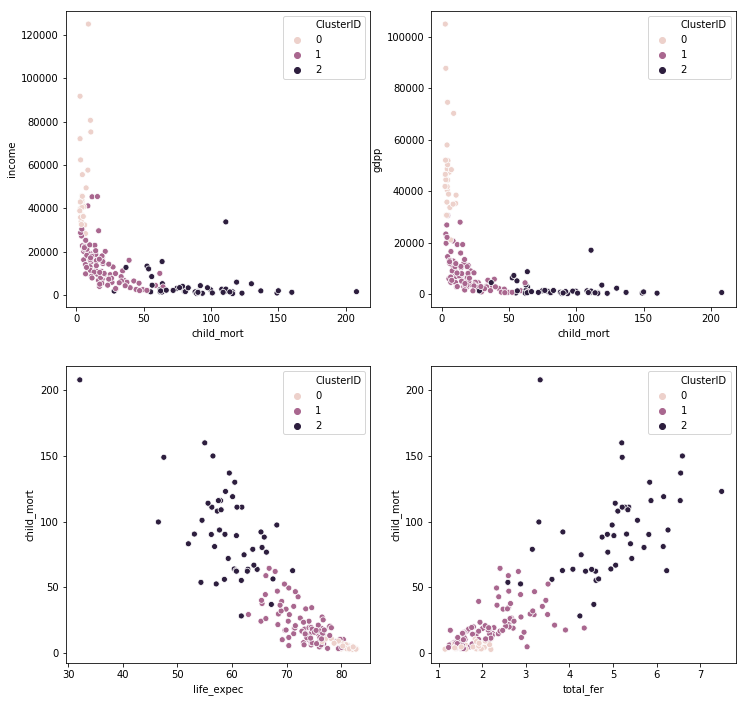

In [46]:
#Lets plot the data to analyse with respect to average values for each clusetr
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
sns.scatterplot(x='child_mort',y='income',hue = 'ClusterID',data=df_Kmeans)
plt.subplot(2,2,2)
sns.scatterplot(x='child_mort',y='gdpp',hue = 'ClusterID',data=df_Kmeans)
plt.subplot(2,2,3)
sns.scatterplot(x='life_expec',y='child_mort',hue = 'ClusterID',data=df_Kmeans)
plt.subplot(2,2,4)
sns.scatterplot(x='total_fer',y='child_mort',hue = 'ClusterID',data=df_Kmeans)
plt.show()

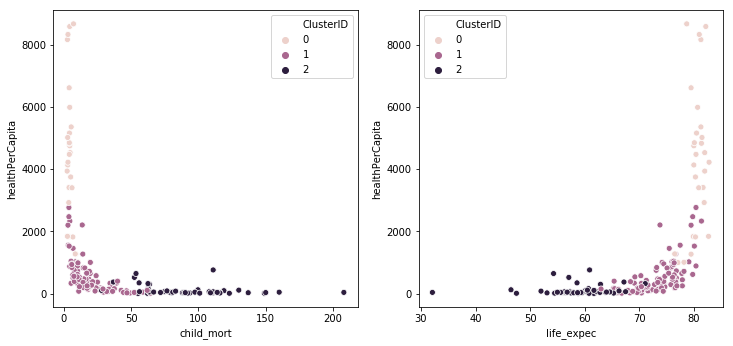

In [47]:
#Lets plot the data to analyse with respect to average values for each clusetr
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
sns.scatterplot(x='child_mort',y='healthPerCapita',hue = 'ClusterID',data=df_Kmeans)
plt.subplot(2,2,2)
sns.scatterplot(x='life_expec',y='healthPerCapita',hue = 'ClusterID',data=df_Kmeans)

**Its quite visible from above plot that countries with less spending on health have high child mortality rate and low life expectency rate**

<a id='kmeansObservations'></a>
### K-Means Clustering Observations
1. Cluster 0 countries have low child mort rate, higher  Income and GDPP - So they are Developed countries
2. Cluster 1 countries have comparitivaly lower child mort rate, mediam  Income and GDPP - So they are Developing countries
3. Cluster 2 countries have highest child mort rate, low Income and GDPP - So they are under developed countries and we should focus on these countries

We have below counts of countries as per their status
1. Developing -   91
2. UnderDeveloped   - 48
3. Developed -     28

We will need to look into 39 countries to identify counties which need aid.

In [48]:
#finding countries which fall below average values of income/GDPP and above average value of child mortality rate

df_Kmeans_select = df_Kmeans[df_Kmeans['income'] <= 3897.354167]
df_Kmeans_select = df_Kmeans_select[df_Kmeans_select['gdpp']<=1909.208333 ]
df_Kmeans_select = df_Kmeans_select[df_Kmeans_select['child_mort'] > 91.610417]

In [49]:
df_Kmeans_select.sort_values(['child_mort','income', 'gdpp'], ascending=[0,1, 1]).head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,ClusterID
66,Haiti,208.0,1500,5.45,32.1,3.33,662,101.286,428.314,45.7442,-3.938184,3.045279,-1.798863,0.068252,Haiti,2
132,Sierra Leone,160.0,1220,17.20,55.0,5.20,399,67.032,137.655,52.2690,-3.224588,2.322560,-0.128087,0.352305,Sierra Leone,2
32,Chad,150.0,1930,6.39,56.5,6.59,897,330.096,390.195,40.6341,-3.186760,2.359783,-1.077936,0.540646,Chad,2
31,Central African Republic,149.0,888,2.01,47.5,5.21,446,52.628,118.190,17.7508,-3.238143,2.182754,-1.613568,0.254538,Central African Republic,2
97,Mali,137.0,1870,4.37,59.5,6.55,708,161.424,248.508,35.2584,-2.945589,2.014719,-1.137255,0.508644,Mali,2


In [50]:
df_Kmeans_select.sort_values(['child_mort','income', 'gdpp','life_expec'], ascending=[0,1, 1,1])['country'].head()

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object

<a id='kmeansFindings'></a>
## K-Means Clustering - Findings

Below 5 countries which belong to cluster 2- should be identified for the aid

- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali

**These countries are with highest Child mortality rate with low income and GDPP, so are in dire need of help.**


<a id='Hierarchical'></a>
## Hierarchical clustering

<a id='single'></a>
### Single Linkage

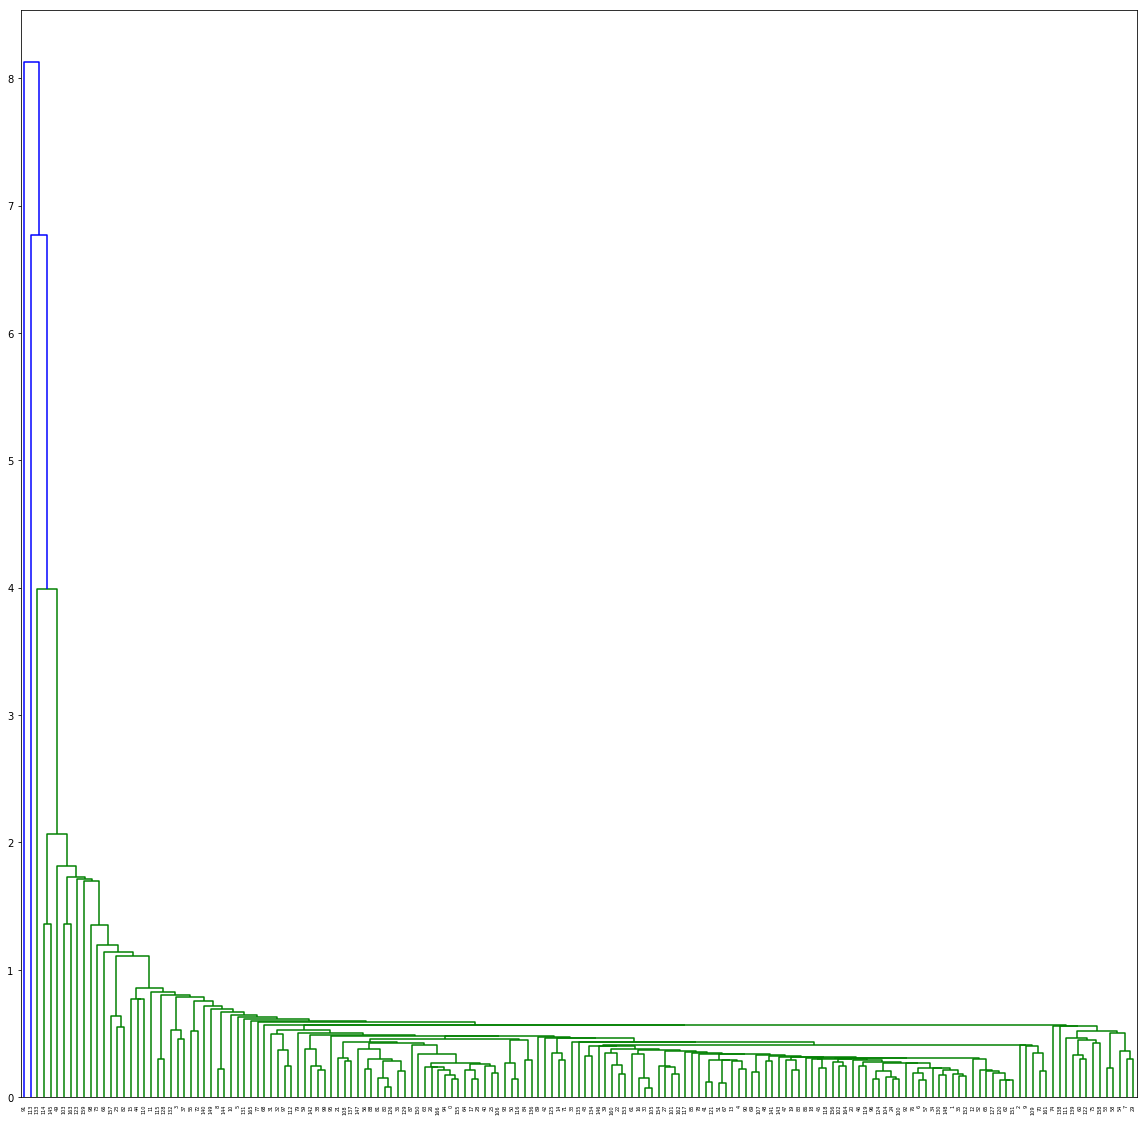

In [51]:
# single linkage
plt.figure(figsize = (20,20))
mergings = linkage(cluster_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [52]:
# 2 clusters
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
# assign the label
df_Hierarchical_single = pca_df
df_Hierarchical_single['cluster_id'] = cluster_labels
df_Hierarchical_single=pd.merge(df,df_Hierarchical_single, how = 'inner', left_on='country', right_on='Country')

In [54]:
df_Hierarchical_single[df_Hierarchical_single['cluster_id'] == 0].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174,-2.636647,1.472085,-0.546500,0.237267,Afghanistan,0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,-0.023845,-1.435816,-0.009080,-0.442921,Albania,0
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,-0.459260,-0.678794,0.967852,-0.176389,Algeria,0
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,-2.723581,2.176018,0.597794,0.438919,Angola,0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,0.648777,-1.026498,-0.244170,-0.267513,Antigua and Barbuda,0


In [55]:
df_Hierarchical_single[df_Hierarchical_single['cluster_id'] == 1]

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
91,Luxembourg,2.8,91700,3.62,81.3,1.63,105000,183750.0,149100.0,8158.5,12.633634,8.2198,-0.571184,-4.587245,Luxembourg,1


### Hierarchical clustering -Single Linkag - Observation
**Clustering with single linkage does not provides us with any useful information.So we will check complete linkage**

<a id='complete'></a>
### Complete Linkage

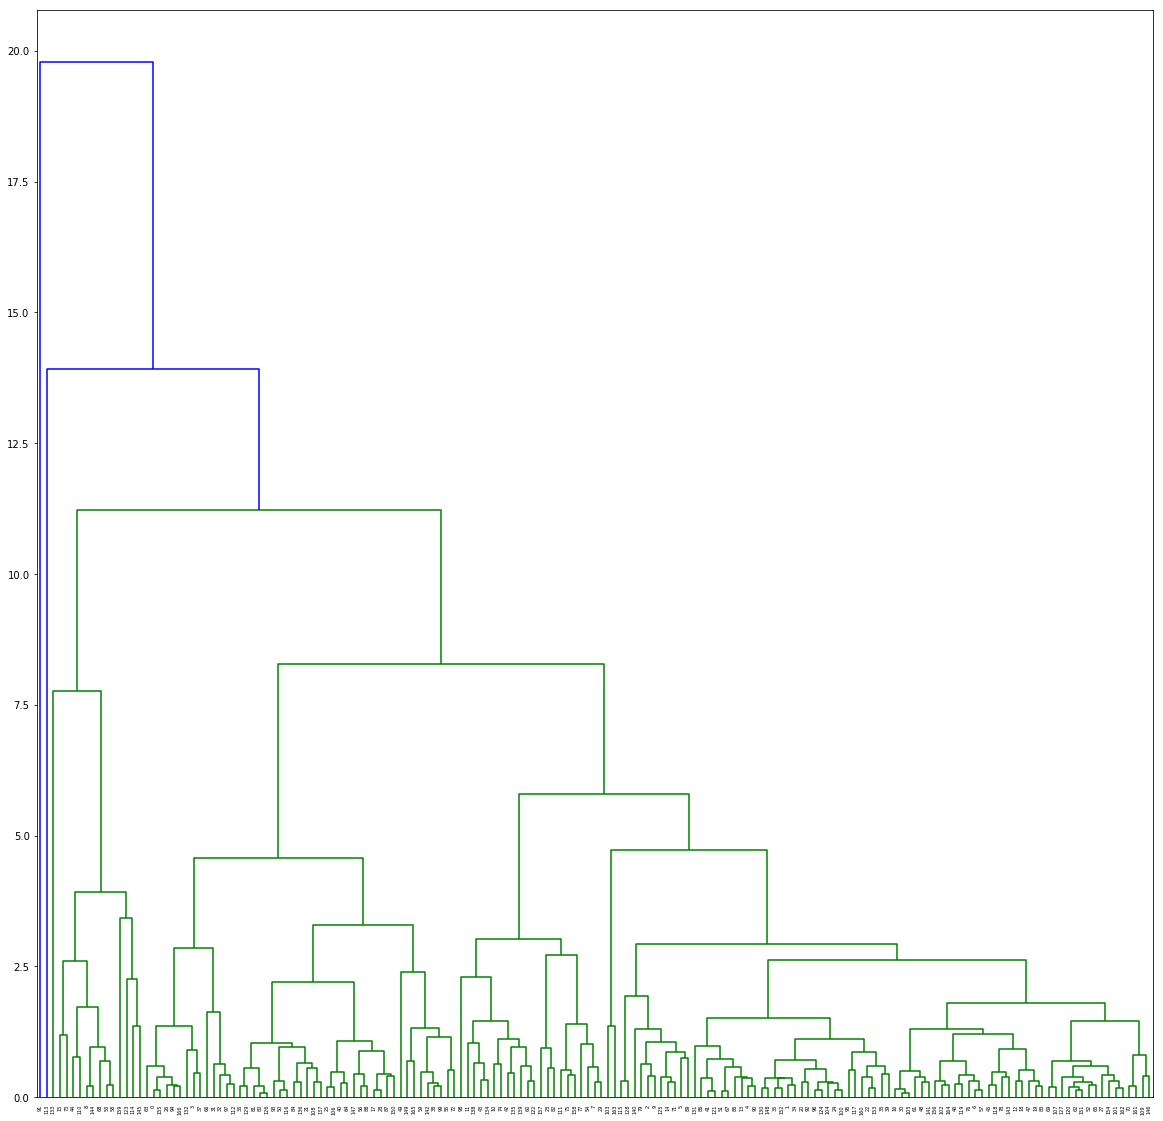

In [56]:
# complete linkage
plt.figure(figsize = (20,20))
mergings = linkage(cluster_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [57]:
# Started with 3 clusters, to find results but have been getting single countries in some of the clusters 
#which is due the outliers in the dataset
cluster_labels = cut_tree(mergings, n_clusters=9).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 1, 4, 1, 1, 1, 4,
       1, 2, 1, 4, 0, 1, 4, 2, 1, 0, 0, 1, 1, 1, 4, 0, 4, 1, 4, 1, 2, 2,
       3, 1, 1, 1, 1, 4, 4, 1, 1, 3, 2, 4, 4, 1, 3, 4, 2, 1, 1, 0, 4, 1,
       0, 1, 3, 1, 1, 1, 4, 3, 2, 2, 1, 2, 1, 1, 4, 4, 2, 1, 4, 1, 1, 4,
       4, 1, 1, 5, 1, 4, 0, 1, 1, 0, 2, 4, 1, 1, 1, 6, 1, 1, 4, 1, 4, 1,
       3, 2, 0, 7, 3, 1, 4, 1, 1, 1, 1, 1, 2, 3, 1, 1, 4, 1, 1, 4, 1, 1,
       0, 8, 2, 2, 4, 4, 2, 2, 1, 1, 4, 1, 3, 3, 1, 4, 1, 4, 4, 1, 1, 1,
       1, 0, 1, 2, 2, 3, 1, 1, 1, 6, 1, 4, 0])

In [58]:
# assign the label
df_Hierarchical_Complete = pca_df
df_Hierarchical_Complete['cluster_id'] = cluster_labels
df_Hierarchical_Complete=pd.merge(df,df_Hierarchical_Complete, how = 'inner', left_on='country', right_on='Country')


In [59]:
df_Hierarchical_Complete[df_Hierarchical_Complete['cluster_id'] == 0].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.3000,248.297,41.9174,-2.636647,1.472085,-0.546500,0.237267,Afghanistan,0
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.1900,1514.370,100.6050,-2.723581,2.176018,0.597794,0.438919,Angola,0
26,Burundi,93.6,764,12.30,57.7,6.26,231,20.6052,90.552,26.7960,-2.763588,1.628834,-0.295656,0.316531,Burundi,0
31,Central African Republic,149.0,888,2.01,47.5,5.21,446,52.6280,118.190,17.7508,-3.238143,2.182754,-1.613568,0.254538,Central African Republic,0
32,Chad,150.0,1930,6.39,56.5,6.59,897,330.0960,390.195,40.6341,-3.186760,2.359783,-1.077936,0.540646,Chad,0


In [60]:
df_Hierarchical_Complete[df_Hierarchical_Complete['cluster_id'] == 1].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.74,267.895,-0.023845,-1.435816,-0.009080,-0.442921,Albania,1
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.44,185.982,-0.459260,-0.678794,0.967852,-0.176389,Algeria,1
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.80,735.660,0.648777,-1.026498,-0.244170,-0.267513,Antigua and Barbuda,1
5,Argentina,14.5,18700,20.90,75.8,2.37,10300,1946.70,1648.00,834.300,0.036447,-0.684622,1.465361,0.066068,Argentina,1
6,Armenia,18.1,6700,7.77,73.3,1.69,3220,669.76,1458.66,141.680,-0.334274,-1.279033,0.190772,-0.501435,Armenia,1


In [61]:
df_Hierarchical_Complete[df_Hierarchical_Complete['cluster_id'] == 2].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
7,Australia,4.8,41400,1.160,82.0,1.93,51900,10276.2,10847.1,4530.87,3.184361,-0.238373,-0.168540,1.669696,Australia,2
10,Bahamas,13.8,22900,-0.393,73.8,1.86,28000,9800.0,12236.0,2209.20,1.499580,-0.425885,-0.557800,0.224968,Bahamas,2
11,Bahrain,8.6,41100,7.440,76.0,2.16,20700,14386.5,10536.3,1028.79,1.471293,-0.325734,0.426551,-0.117964,Bahrain,2
23,Brunei,10.5,80600,16.700,77.1,1.84,35300,23792.2,9884.0,1002.52,2.698699,0.376828,1.622199,0.306712,Brunei,2
29,Canada,5.6,40700,2.870,81.3,1.63,47400,13793.4,14694.0,5356.20,3.397763,-0.065365,-0.098953,1.574294,Canada,2


In [62]:
df_Hierarchical_Complete[df_Hierarchical_Complete['cluster_id'] == 3].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
8,Austria,4.3,43200,0.873,80.5,1.44,46900,24059.7,22418.2,5159.0,3.818137,0.262614,-0.297336,0.974405,Austria,3
15,Belgium,4.5,41100,1.880,80.0,1.86,44400,33921.6,33166.8,4750.8,3.961102,0.837658,-0.295168,0.243892,Belgium,3
44,Denmark,4.1,44000,3.220,79.5,1.87,58000,29290.0,25288.0,6612.0,4.379423,0.928432,-0.225448,1.502264,Denmark,3
53,Finland,3.0,39800,0.351,80.0,1.87,46200,17879.4,17278.8,4134.9,3.203899,0.002812,-0.307152,0.989393,Finland,3
58,Germany,4.2,40400,0.758,80.1,1.39,41800,17681.4,15507.8,4848.8,3.302161,-0.155142,-0.280614,1.124339,Germany,3


In [63]:
df_Hierarchical_Complete[df_Hierarchical_Complete['cluster_id'] == 4].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
17,Benin,111.0,1820,0.885,61.8,5.36,758,180.404,281.976,31.0780,-2.365009,1.173238,-1.241980,0.238688,Benin,4
21,Botswana,52.5,13300,8.920,57.1,2.88,6350,2768.600,3257.550,527.0500,-1.129553,0.400938,-0.237767,-0.137562,Botswana,4
25,Burkina Faso,116.0,1430,6.810,57.9,5.87,575,110.400,170.200,38.7550,-2.752610,1.667121,-0.846749,0.327235,Burkina Faso,4
28,Cameroon,108.0,2660,1.910,57.3,5.11,1310,290.820,353.700,67.2030,-2.439899,1.289834,-1.224822,0.194815,Cameroon,4
36,Comoros,88.2,1410,3.870,65.9,4.75,769,126.885,397.573,34.6819,-1.949935,0.605858,-0.770259,0.087001,Comoros,4


In [64]:
df_Hierarchical_Complete[df_Hierarchical_Complete['cluster_id'] == 5].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
91,Luxembourg,2.8,91700,3.62,81.3,1.63,105000,183750.0,149100.0,8158.5,12.633634,8.2198,-0.571184,-4.587245,Luxembourg,5


In [65]:
df_Hierarchical_Complete[df_Hierarchical_Complete['cluster_id'] == 6].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
103,Mongolia,26.1,7710,39.2,66.2,2.64,2650,1237.55,1502.55,144.16,-1.269899,0.076301,2.771375,-0.330801,Mongolia,6
163,Venezuela,17.1,16500,45.9,75.4,2.47,13500,3847.50,2376.00,662.85,-0.313054,-0.016860,3.661137,0.034534,Venezuela,6


In [66]:
df_Hierarchical_Complete[df_Hierarchical_Complete['cluster_id'] == 7].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
113,Nigeria,130.0,5150,104.0,60.5,5.84,2330,589.49,405.42,118.131,-3.931333,3.825005,7.867898,0.576284,Nigeria,7


In [67]:
df_Hierarchical_Complete[df_Hierarchical_Complete['cluster_id'] == 8].head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
133,Singapore,2.8,72100,-0.046,82.7,1.15,46600,93200.0,81084.0,1845.36,6.582494,2.913633,-0.224591,-3.496339,Singapore,8


<a id='HierarchicalclusteringAnalysis'></a>
## Hierarchical clustering - Analysis

In [68]:
clu_child_mort = pd.DataFrame(df_Hierarchical_Complete.groupby(["cluster_id"]).child_mort.mean())
clu_income= pd.DataFrame(df_Hierarchical_Complete.groupby(["cluster_id"]).income.mean())
clu_gdpp = pd.DataFrame(df_Hierarchical_Complete.groupby(["cluster_id"]).gdpp.mean())
clu_healthPerCapita = pd.DataFrame(df_Hierarchical_Complete.groupby(["cluster_id"]).healthPerCapita.mean())
clu_life_expec = pd.DataFrame(df_Hierarchical_Complete.groupby(["cluster_id"]).life_expec.mean())
clu_total_fer = pd.DataFrame(df_Hierarchical_Complete.groupby(["cluster_id"]).total_fer.mean())
df_Cluster_analysis = pd.concat([pd.Series([0,1,2,3,4,5,6,7,8]),clu_child_mort,clu_income,clu_gdpp,clu_healthPerCapita, clu_life_expec,clu_total_fer], axis=1)
df_Cluster_analysis.columns = ["cluster_id","child_mort","income","gdpp","healthPerCapita","life_expec","total_fer"]
df_Cluster_analysis

,cluster_id,child_mort,income,gdpp,healthPerCapita,life_expec,total_fer
0,0,122.100000,1724.642857,805.000000,43.367793,54.342857,5.810714
1,1,21.960000,12309.750000,6242.775000,392.801255,72.991250,2.282750
2,2,5.900000,37713.636364,31581.818182,2589.409091,79.468182,1.739091
3,3,4.492308,51815.384615,54723.076923,5520.079231,80.469231,1.840000
4,4,77.512121,4781.151515,2364.909091,145.035291,61.278788,4.619091
5,5,2.800000,91700.000000,105000.000000,8158.500000,81.300000,1.630000
6,6,21.600000,12105.000000,8075.000000,403.505000,70.800000,2.555000
7,7,130.000000,5150.000000,2330.000000,118.131000,60.500000,5.840000
8,8,2.800000,72100.000000,46600.000000,1845.360000,82.700000,1.150000


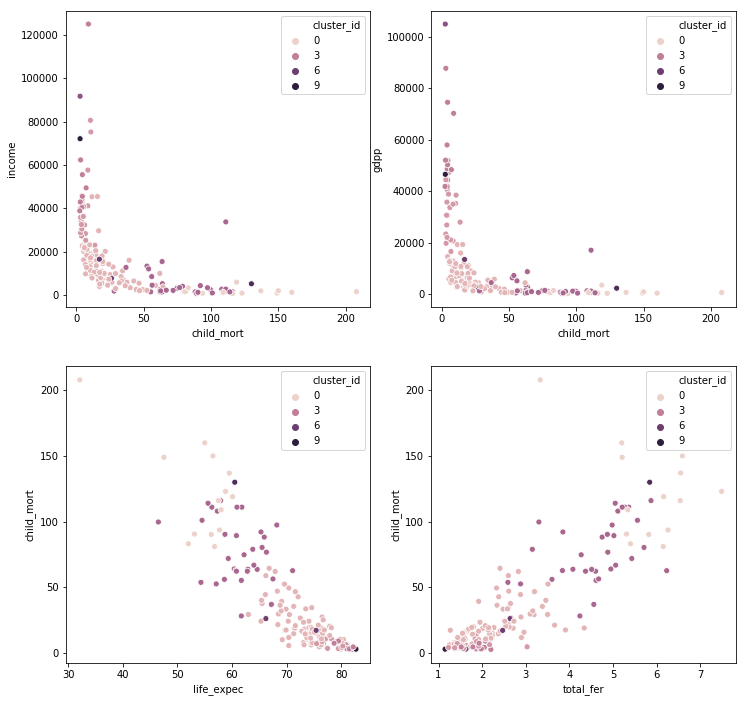

In [69]:
#Lets plot the data to analyse with respect to average values for each clusetr
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
sns.scatterplot(x='child_mort',y='income',hue = 'cluster_id',data=df_Hierarchical_Complete)
plt.subplot(2,2,2)
sns.scatterplot(x='child_mort',y='gdpp',hue = 'cluster_id',data=df_Hierarchical_Complete)
plt.subplot(2,2,3)
sns.scatterplot(x='life_expec',y='child_mort',hue = 'cluster_id',data=df_Hierarchical_Complete)
plt.subplot(2,2,4)
sns.scatterplot(x='total_fer',y='child_mort',hue = 'cluster_id',data=df_Hierarchical_Complete)
plt.show()

In [70]:
#finding countries which fall below average values of income/GDPP and above average value of child mortality rate

df_hierarachical_select = df_Hierarchical_Complete[df_Hierarchical_Complete['income'] <= 1724.642857]
df_hierarachical_select = df_hierarachical_select[df_hierarachical_select['gdpp']<=805.000000 ]
df_hierarachical_select = df_hierarachical_select[df_hierarachical_select['child_mort'] > 122.100000]

In [71]:
df_hierarachical_select.sort_values(['child_mort','income', 'gdpp'], ascending=[0,1, 1]).head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsPerCapita,importsPerCapita,healthPerCapita,PC1,PC2,PC3,PC4,Country,cluster_id
66,Haiti,208.0,1500,5.45,32.1,3.33,662,101.286,428.314,45.7442,-3.938184,3.045279,-1.798863,0.068252,Haiti,0
132,Sierra Leone,160.0,1220,17.20,55.0,5.20,399,67.032,137.655,52.2690,-3.224588,2.322560,-0.128087,0.352305,Sierra Leone,0
31,Central African Republic,149.0,888,2.01,47.5,5.21,446,52.628,118.190,17.7508,-3.238143,2.182754,-1.613568,0.254538,Central African Republic,0
112,Niger,123.0,814,2.55,58.8,7.49,348,77.256,170.868,17.9568,-3.062410,2.108832,-1.311093,0.595813,Niger,0


<a id='HierarchicalclusteringFinding'></a>
## Hierarchical clustering - Findings

**It seems Hierarchical clustering is sensitive to the outliers in the data.**
**Creation of clusters with single contries in it is result of this.**

With Similar number of cluster, K-means clustering is providing better results, So I will take K-means clustering for results for this problem statement

<a id='Recommendation'></a>
## Recommendation:-

Below 5 countries which belong to cluster 2- should be identified for the aid

- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali

**These countries are with highest Child mortality rate with low income and GDPP, so are in dire need of help.**
